In [206]:
import pandas as pd
import numpy as np
import matplotlib as plt
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [2]:
raw_data = pd.read_csv("../../Data/GRUPO DRAGON 2018/ech1 18092018/ech1 18092018.txt", encoding = "utf8")

In [3]:
raw_data.head()

,SDR 7.8.18
0,-----Logger Information-----
1,Model #\t4280
2,Serial #\t09279
3,Hardware Rev.\t023-022-000
4,-----Site Information-----


In [4]:
# "Sensor History\n", "Data\n" son las lineas fundamentales

In [5]:
type(raw_data)

pandas.core.frame.DataFrame

In [6]:
raw_data.columns

Index(['SDR\t7.8.18'], dtype='object')

In [7]:
len(raw_data['SDR\t7.8.18'])

50612

In [8]:
type(raw_data['SDR\t7.8.18'])

pandas.core.series.Series

In [143]:
raw_data[raw_data['SDR\t7.8.18'].str.contains('Date & Time Stamp')]

columns_names = raw_data[raw_data['SDR\t7.8.18'].str.contains('Date & Time Stamp')]['SDR\t7.8.18'].str.split('\t')
columns_names = columns_names[150]

In [144]:
raw_data_splitted = raw_data['SDR\t7.8.18'].str.split('\t', expand = True)

In [145]:
raw_data_new = pd.DataFrame(raw_data_splitted[raw_data_splitted[raw_data_splitted[0].str.contains('Date & Time Stamp')].index[0] +1:])
raw_data_new.columns = columns_names
raw_data_new.reset_index(drop=True, inplace=True)
raw_data_new['Date & Time Stamp'] = pd.to_datetime(raw_data_new['Date & Time Stamp'])

In [148]:
raw_data_new.head()

,Date & Time Stamp,CH1Avg,CH1SD,CH1Max,CH1Min,CH2Avg,CH2SD,CH2Max,CH2Min,CH3Avg,...,CH13Max,CH13Min,CH14Avg,CH14SD,CH14Max,CH14Min,CH15Avg,CH15SD,CH15Max,CH15Min
0,2017-09-11 00:00:00,11.8,0.5,13,10.7,12.3,0.8,13.7,10.7,9.3,...,13.2,10.9,12,0.3,12.8,11.3,0.4,0,0.4,0.4
1,2017-09-11 00:10:00,11,1,12.6,8.8,12.1,0.9,13.7,9.1,9.5,...,13.2,11.7,12.3,0.3,13.2,11.7,0.4,0,0.4,0.4
2,2017-09-11 00:20:00,9.4,0.7,11.4,8.4,9.8,1.1,13.4,8,12.8,...,14.4,12.1,13,0.4,14,12.1,0.4,0,0.4,0.4
3,2017-09-11 00:30:00,9.3,0.7,12.2,8,9.9,1.2,13.7,8,12.7,...,13.2,11.7,12.3,0.3,13.2,11.7,0.4,0,0.4,0.4
4,2017-09-11 00:40:00,9.6,0.8,12.6,8.4,12.2,1,14.1,8.8,12.2,...,12.8,11.7,12.5,0.3,13.6,11.7,0.4,0,0.4,0.4


In [195]:
plotting_avg = raw_data_new.filter(regex='Avg|Date')
#plotting_avg['CH1Avg'] = pd.to_numeric(plotting_avg['CH1Avg'], errors='coerce')

In [201]:
for cols in plotting_avg.loc[:, plotting_avg.columns != 'Date & Time Stamp']:
    plotting_avg.loc[:, cols] = pd.to_numeric(plotting_avg[cols], errors='coerce')

plotting_avg.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Date & Time Stamp    datetime64[ns]
CH1Avg                      float64
CH2Avg                      float64
CH3Avg                      float64
CH4Avg                      float64
CH5Avg                      float64
CH6Avg                      float64
CH7Avg                        int64
CH8Avg                        int64
CH9Avg                      float64
CH10Avg                     float64
CH11Avg                     float64
CH12Avg                     float64
CH13Avg                     float64
CH14Avg                     float64
CH15Avg                     float64
dtype: object

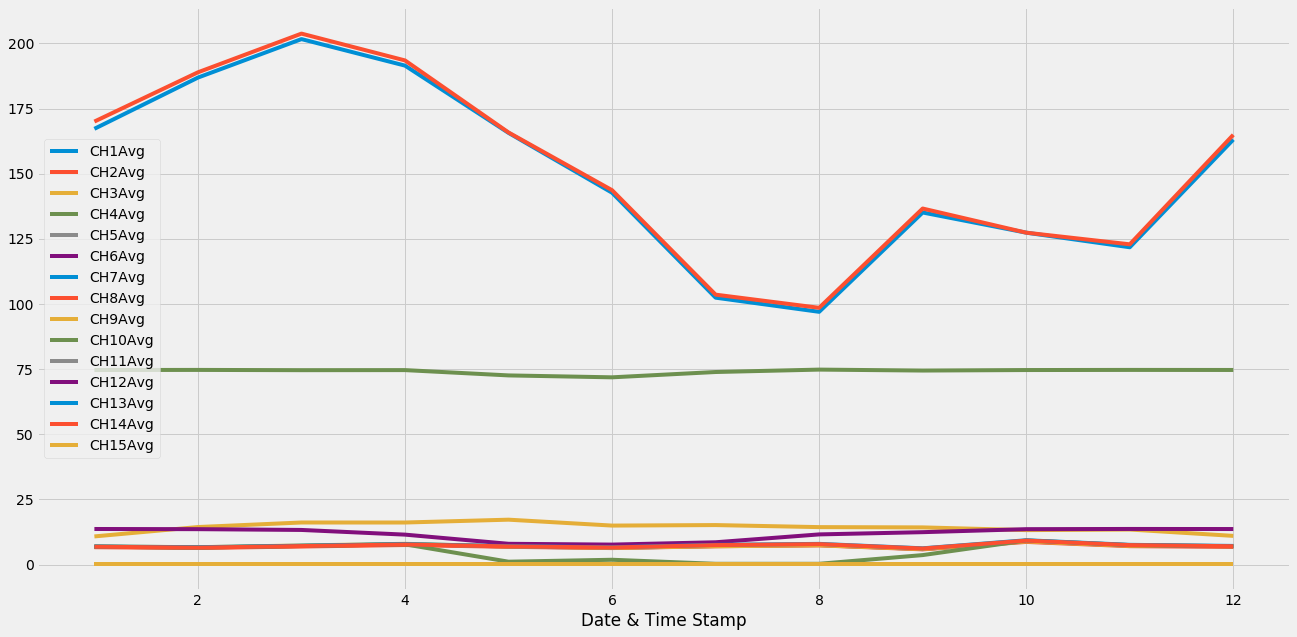

In [207]:
plotting_avg.groupby(plotting_avg['Date & Time Stamp'].dt.month).mean().plot()